In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('datafin1.csv')
df.head()

,semestre actual,estrato,promedio carrera,promedio semestre,etiqueta
0,10,1,2.833,3.50,0
1,10,3,2.542,0.00,0
2,6,1,0.000,0.00,1
3,3,2,3.375,3.70,1
4,2,3,2.541,3.05,0


In [11]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos (si los hay)
df = df.dropna()

# Separar variables independientes (X) y dependiente (y)
X = df.drop(columns=['etiqueta'])  # Variables independientes
y = df['etiqueta']                # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


semestre actual      0
estrato              0
promedio carrera     0
promedio semestre    0
etiqueta             0
dtype: int64


# entrenamineto del svm

In [12]:
# Entrenar un modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Mostrar un resumen básico del modelo ajustado
print("Modelo SVM entrenado.")


Modelo SVM entrenado.


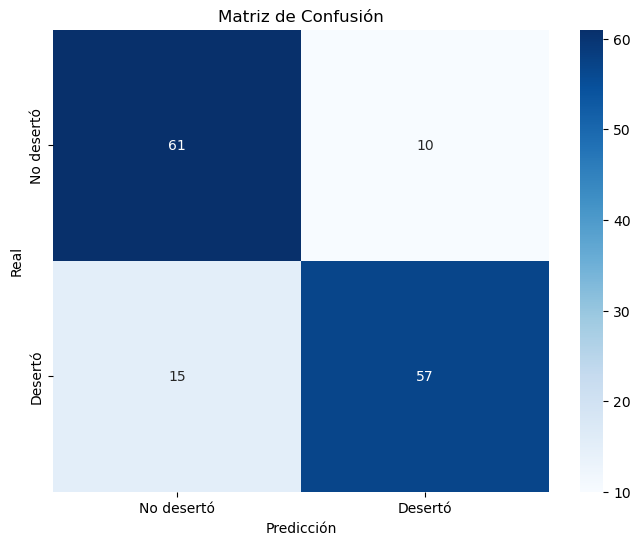

In [14]:
# Predecir en el conjunto de prueba
y_pred = svm_model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No desertó", "Desertó"], yticklabels=["No desertó", "Desertó"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [15]:
# Reporte de clasificación y precisión del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Precisión global
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        71
           1       0.85      0.79      0.82        72

    accuracy                           0.83       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143

Precisión del modelo: 0.83


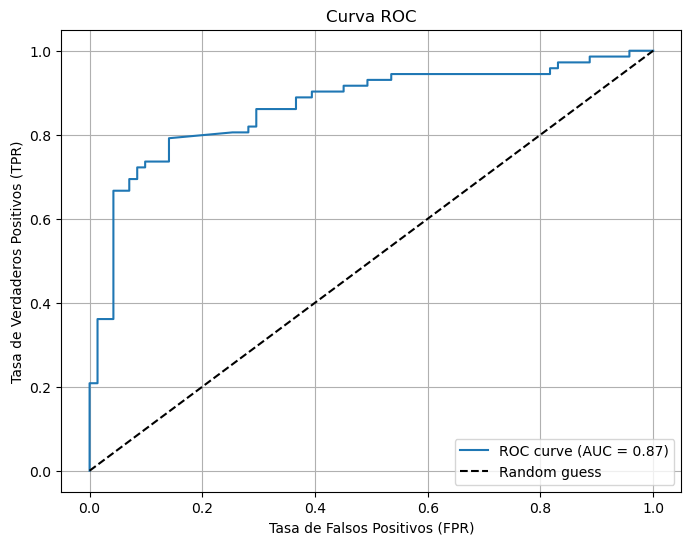

In [16]:
# Calcular probabilidades de predicción
y_proba = svm_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random guess")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [18]:
# Ingresar los datos de un estudiante
nuevo_estudiante = pd.DataFrame({
    'semestre actual': [10],  # Cambia estos valores para un estudiante nuevo
    'estrato': [2],
    'promedio carrera': [3.0],
    'promedio semestre': [3.5]
})

# Realizar la predicción
prediccion = svm_model.predict(nuevo_estudiante)[0]
probabilidad = svm_model.predict_proba(nuevo_estudiante)[0][1]

estado = "Desertó" if prediccion == 1 else "No desertó"
print(f"Predicción: {estado}")
print(f"Probabilidad de desertar: {probabilidad:.2f}")


Predicción: No desertó
Probabilidad de desertar: 0.20
